This code takes carbon emission and sequestration data across Y2Y and outputs a bar plot. Due to differences in data quality and processing methods throughout time, I only included years 2015-2023 for the annual comparison.

## Load packages and data

In [70]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Create function to process data

In [74]:
def clean_seq_data(filename):

    # load sequestration data
    df = pd.read_csv(filename)

    # filter df for annual emissions
    df_emissions = df.filter(regex=r'gfw_forest_carbon_gross_emissions_\d{4}__Mg_C')

    # Rename columns to just the year
    df_emissions = df_emissions.rename(columns=lambda x: x.split("_")[5] if "gfw_forest_carbon_gross_emissions_" in x else x)

    # Melt the DataFrame for plotting
    df_emissions_melted = df_emissions.melt(var_name="Year", value_name="Emissions")

    # Convert "Year" to an integer for proper ordering
    df_emissions_melted["Year"] = df_emissions_melted["Year"].astype(int)

    # divide emissions by 1e6 to get million tons
    df_emissions_melted['Emissions'] = df_emissions_melted['Emissions'] / 1e6

    # Compute a 3-year moving average
    df_emissions_3yr = df_emissions_melted.groupby("Year", as_index=False)["Emissions"].mean()
    df_emissions_3yr["Emissions"] = df_emissions_3yr["Emissions"].rolling(window=3, min_periods=1).mean()

    # create a df only 2015 onward
    df_emissions_melted_2015 = df_emissions_melted.query('Year >= 2015')

    # save annual average sequestration in million tons
    mean_seques = df['gfw_forest_carbon_average_annual_removals__Mg(C)_yr-1'].values.item() / 1e6

    # save annual average emissions in million tons
    mean_emissions = df['gfw_forest_carbon_average_annual_emissions__Mg(C)_yr-1'].values.item() / 1e6

    return df_emissions_melted, df_emissions_melted_2015, mean_seques, mean_emissions

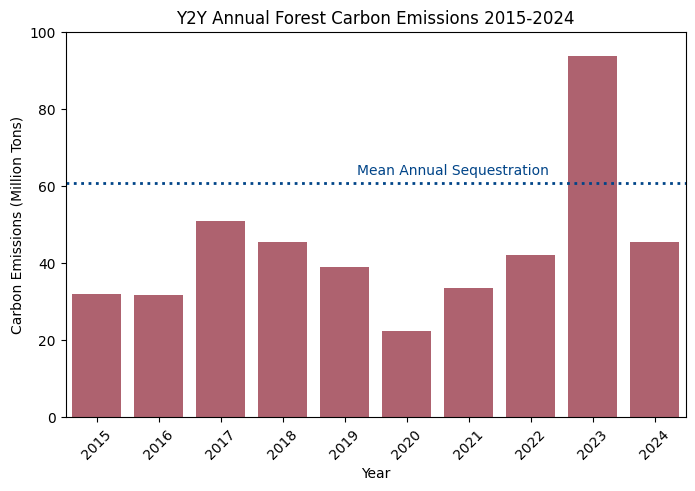

In [76]:
# clean y2y data
df_emissions_melted, df_emissions_melted_2015, mean_seques, mean_emissions = clean_seq_data('./outputs/y2y_carbon_sequestration.csv')


# # Create a bar plot
# plt.figure(figsize=(8, 5))
# sns.barplot(x="Year", y="Emissions", data=df_emissions_melted, estimator=sum, errorbar=None, color="#BB5566")

# # Add a dotted line at mean removals
# plt.axhline(y=mean_seques, color='#004488', linestyle='dotted', linewidth=2)

# # Add a dotted line at mean emissions
# plt.axhline(y=mean_emissions, color='#000000', linestyle='dotted', linewidth=2)

# # add a label for mean removals
# plt.text(x=20, y=mean_seques+2, s="Mean Annual Sequestration", color='#004488', fontsize=10, ha='right')

# # add a label for mean emissions
# plt.text(x=14.2, y=mean_emissions+2, s="Mean Annual Emissions", color='#000000', fontsize=10, ha='right')

# # Customize plot
# plt.xlabel("Year")
# plt.ylabel("Carbon Emissions (Million Tons)")
# plt.title('Y2Y Annual Forest Carbon Emissions 2001-2024')
# plt.xticks(rotation=45)
# plt.yticks([0, 20, 40, 60, 80, 100])
# plt.show()

# Create a bar plot, only 2015 onward
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="Emissions", data=df_emissions_melted_2015, estimator=sum, errorbar=None, color="#BB5566")

# Add a dotted line at mean removals
plt.axhline(y=mean_seques, color='#004488', linestyle='dotted', linewidth=2)

# Add a dotted line at mean emissions
#plt.axhline(y=mean_emissions, color='#000000', linestyle='dotted', linewidth=2)

# add a label for mean removals
plt.text(x=7.3, y=mean_seques+2, s="Mean Annual Sequestration", color='#004488', fontsize=10, ha='right')

# add a label for mean emissions
#plt.text(x=6.8, y=mean_emissions+2, s="Mean Annual Emissions", color='#000000', fontsize=10, ha='right')

# Customize plot
plt.xlabel("Year")
plt.ylabel("Carbon Emissions (Million Tons)")
plt.title('Y2Y Annual Forest Carbon Emissions 2015-2024')
plt.xticks(rotation=45)
plt.yticks([0, 20, 40, 60, 80, 100])
plt.show()

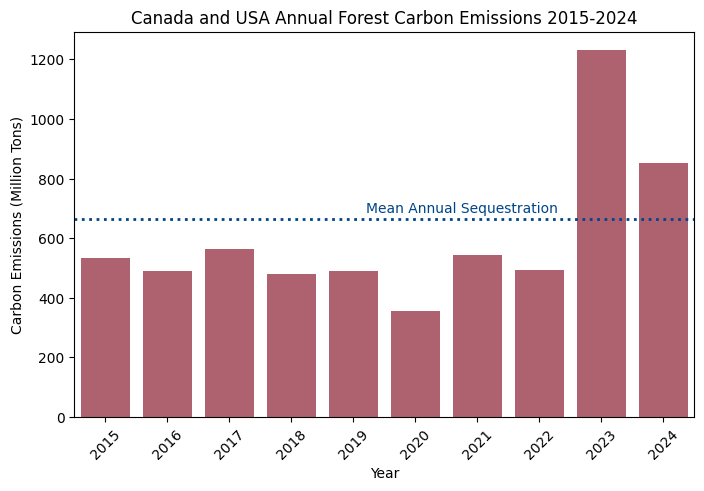

In [77]:
# clean CAN/US data
df_emissions_melted, df_emissions_melted_2015, mean_seques, mean_emissions = clean_seq_data('./outputs/us_can_carbon_sequestration.csv')

# Create a bar plot, only 2015 onward
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="Emissions", data=df_emissions_melted_2015, estimator=sum, errorbar=None, color="#BB5566")

# Add a dotted line at mean removals
plt.axhline(y=mean_seques, color='#004488', linestyle='dotted', linewidth=2)

# Add a dotted line at mean emissions
#plt.axhline(y=mean_emissions, color='#000000', linestyle='dotted', linewidth=2)

# add a label for mean removals
plt.text(x=7.3, y=mean_seques+20, s="Mean Annual Sequestration", color='#004488', fontsize=10, ha='right')

# add a label for mean emissions
#plt.text(x=6.8, y=mean_emissions+2, s="Mean Annual Emissions", color='#000000', fontsize=10, ha='right')

# Customize plot
plt.xlabel("Year")
plt.ylabel("Carbon Emissions (Million Tons)")
plt.title('Canada and USA Annual Forest Carbon Emissions 2015-2024')
plt.xticks(rotation=45)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200])
plt.show()


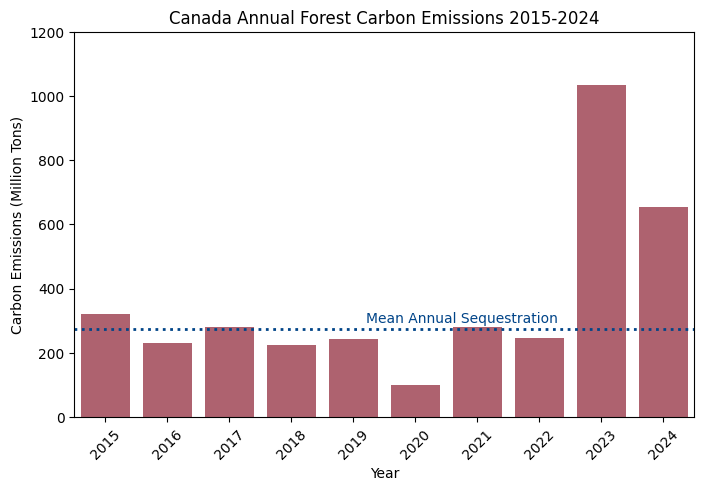

In [78]:
# clean CAN data
df_emissions_melted, df_emissions_melted_2015, mean_seques, mean_emissions = clean_seq_data('./outputs/can_carbon_sequestration.csv')

# Create a bar plot, only 2015 onward
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="Emissions", data=df_emissions_melted_2015, estimator=sum, errorbar=None, color="#BB5566")

# Add a dotted line at mean removals
plt.axhline(y=mean_seques, color='#004488', linestyle='dotted', linewidth=2)

# Add a dotted line at mean emissions
#plt.axhline(y=mean_emissions, color='#000000', linestyle='dotted', linewidth=2)

# add a label for mean removals
plt.text(x=7.3, y=mean_seques+20, s="Mean Annual Sequestration", color='#004488', fontsize=10, ha='right')

# add a label for mean emissions
#plt.text(x=6.8, y=mean_emissions+2, s="Mean Annual Emissions", color='#000000', fontsize=10, ha='right')

# Customize plot
plt.xlabel("Year")
plt.ylabel("Carbon Emissions (Million Tons)")
plt.title('Canada Annual Forest Carbon Emissions 2015-2024')
plt.xticks(rotation=45)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200])
plt.show()

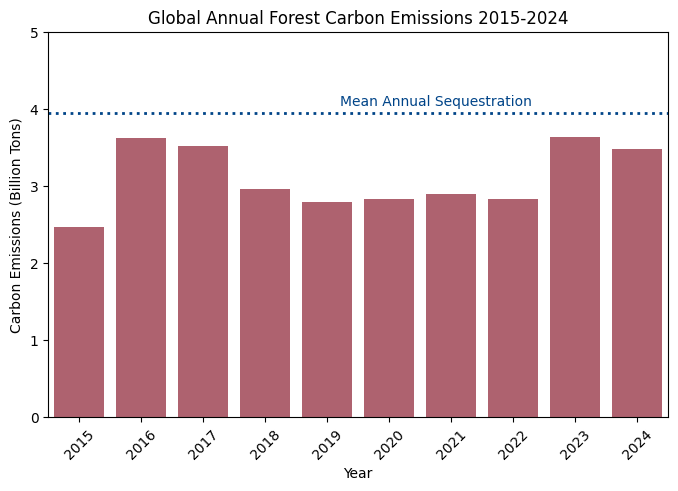

In [79]:
# clean global data
df_emissions_melted, df_emissions_melted_2015, mean_seques, mean_emissions = clean_seq_data('./outputs/global_carbon_sequestration.csv')

# change data to billions
df_emissions_melted_2015.loc[:, 'Emissions'] = df_emissions_melted_2015.loc[:, 'Emissions'] / 1000
mean_seques = mean_seques / 1000

# Create a bar plot, only 2015 onward
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="Emissions", data=df_emissions_melted_2015, estimator=sum, errorbar=None, color="#BB5566")

# Add a dotted line at mean removals
plt.axhline(y=mean_seques, color='#004488', linestyle='dotted', linewidth=2)

# Add a dotted line at mean emissions
#plt.axhline(y=mean_emissions, color='#000000', linestyle='dotted', linewidth=2)

# add a label for mean removals
plt.text(x=7.3, y=mean_seques+.1, s="Mean Annual Sequestration", color='#004488', fontsize=10, ha='right')

# add a label for mean emissions
#plt.text(x=6.8, y=mean_emissions+2, s="Mean Annual Emissions", color='#000000', fontsize=10, ha='right')

# Customize plot
plt.xlabel("Year")
plt.ylabel("Carbon Emissions (Billion Tons)")
plt.title('Global Annual Forest Carbon Emissions 2015-2024')
plt.xticks(rotation=45)
plt.yticks([0, 1, 2, 3, 4, 5])
plt.show()